# Task 1: Neighbourhood-Based User Profiling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_squared_error


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File 

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
# Get data - format based on Readme file
movies = pd.read_csv(
    './ml-1m/movies.dat',
    sep='::',
    engine='python',
    encoding='ISO-8859-1',
    names=['MovieID', 'Title', 'Genres']
)

ratings = pd.read_csv(
    './ml-1m/ratings.dat',
    sep='::',
    engine='python',
    encoding='ISO-8859-1',
    names=['UserID', 'MovieID', 'Rating', 'Timestamp']
)

users = pd.read_csv(
    './ml-1m/users.dat',
    sep='::',
    engine='python',
    encoding='ISO-8859-1',
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
)

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Merge ratings and movies dataframes
ratings_movies = pd.merge(ratings, movies, on='MovieID')
ratings_movies.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [6]:
# Create user-user cosine matrix 
user_user_matrix = ratings_movies.pivot(index='UserID', columns='MovieID', values='Rating')
user_user_matrix

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Pick random userID
random_userID = np.random.choice(user_user_matrix.index)
user_ratings = user_user_matrix.loc[random_userID]
user_ratings[user_ratings.notna()]

MovieID
50      5.0
70      3.0
94      5.0
110     4.0
260     5.0
296     4.0
431     5.0
493     4.0
527     5.0
589     3.0
608     5.0
724     5.0
858     5.0
1036    4.0
1088    3.0
1101    3.0
1172    5.0
1193    5.0
1196    5.0
1197    1.0
1198    4.0
1210    4.0
1213    5.0
1221    5.0
1307    5.0
1617    5.0
1645    4.0
1912    3.0
1953    5.0
1954    4.0
1992    3.0
2028    5.0
2248    4.0
2369    2.0
2391    5.0
2500    2.0
2571    4.0
2617    3.0
2692    5.0
2736    4.0
2762    5.0
2829    2.0
2858    5.0
2966    3.0
2997    5.0
3006    4.0
3362    4.0
3418    4.0
3476    5.0
3515    3.0
3578    4.0
Name: 5739, dtype: float64

In [8]:
# Get list of movies rated by the user
rated_movies = user_ratings[user_ratings.notna()].index.tolist()

# Shuffle and split into train and test sets (80/20)
np.random.shuffle(rated_movies)
train_size = int(0.8 * len(rated_movies))
train_movies = rated_movies[:train_size]
test_movies = rated_movies[train_size:]

# Make copy of user ratings for training
train_ratings = user_ratings.copy()
train_ratings.loc[test_movies] = np.nan # Set test movies to NaN 
train_ratings.head(20)

MovieID
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
Name: 5739, dtype: float64

### 1.2: Calculate performances of 3 similarity metrics chosen

In [9]:
# Compute cosine similarity between users
user_sim_cosine = pd.DataFrame(
    cosine_similarity(user_user_matrix.fillna(0)),
    index=user_user_matrix.index,
    columns=user_user_matrix.index
)
user_sim_cosine.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.096382,0.120610,0.132455,0.090158,0.179222,0.059678,0.138241,0.226148,0.255288,...,0.170588,0.082006,0.069807,0.033663,0.114877,0.186329,0.135979,0.000000,0.174604,0.133590
2,0.096382,1.000000,0.151479,0.171176,0.114394,0.100865,0.305787,0.203337,0.190198,0.226861,...,0.112503,0.091222,0.268565,0.014286,0.183384,0.228241,0.206274,0.066118,0.066457,0.218276
3,0.120610,0.151479,1.000000,0.151227,0.062907,0.074603,0.138332,0.077656,0.126457,0.213655,...,0.092960,0.125864,0.161507,0.000000,0.097308,0.143264,0.107744,0.120234,0.094675,0.133144
4,0.132455,0.171176,0.151227,1.000000,0.045094,0.013529,0.130339,0.100856,0.093651,0.120738,...,0.163629,0.093041,0.382803,0.000000,0.082097,0.170583,0.127464,0.062907,0.064634,0.137968
5,0.090158,0.114394,0.062907,0.045094,1.000000,0.047449,0.126257,0.220817,0.261330,0.117052,...,0.100652,0.035732,0.061806,0.054151,0.179083,0.293365,0.172686,0.020459,0.027689,0.241437


In [10]:
# Create binary user-item matrix for Jaccard similarity
binary_matrix = user_user_matrix.notna().astype(int)

# Compute jaccard similarity between users
user_sim_jaccard = pd.DataFrame(
    1 - pairwise_distances(binary_matrix.values, metric='jaccard'),
    index=user_user_matrix.index,
    columns=user_user_matrix.index
) 
user_sim_jaccard.head()

/Users/nhinguyen/anaconda3/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2462: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.040000,0.061224,0.057143,0.041494,0.087719,0.024390,0.054945,0.104167,0.083532,...,0.083333,0.039735,0.027273,0.013699,0.027778,0.038631,0.049383,0.000000,0.093168,0.045093
2,0.040000,1.000000,0.071429,0.056338,0.065147,0.058201,0.126761,0.112033,0.087963,0.101871,...,0.046512,0.044843,0.118343,0.006711,0.079156,0.078473,0.099668,0.020548,0.032787,0.111111
3,0.061224,0.071429,1.000000,0.074627,0.024691,0.051724,0.078947,0.038251,0.060811,0.073634,...,0.051546,0.054422,0.077670,0.000000,0.034375,0.033003,0.045455,0.044118,0.048193,0.053763
4,0.057143,0.056338,0.074627,1.000000,0.013889,0.010989,0.083333,0.032258,0.032520,0.029268,...,0.074627,0.041667,0.191176,0.000000,0.023810,0.021348,0.032407,0.051282,0.021277,0.037249
5,0.041494,0.065147,0.024691,0.013889,1.000000,0.026718,0.060185,0.119601,0.134328,0.063943,...,0.046218,0.013423,0.036145,0.013889,0.081448,0.124224,0.089918,0.013953,0.009434,0.120582


In [11]:
# Compute manhattan distance similarity between users
user_sim_manhattan = pd.DataFrame(
    1 / (1 + pairwise_distances(user_user_matrix.fillna(0).values, metric='manhattan')),
    index=user_user_matrix.index,
    columns=user_user_matrix.index
)
user_sim_manhattan.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.001548,0.002646,0.003610,0.001272,0.002381,0.002950,0.001468,0.002012,0.000628,...,0.002890,0.001653,0.002347,0.003322,0.001136,0.000345,0.001139,0.003344,0.001689,0.000760
2,0.001548,1.000000,0.001681,0.001976,0.001003,0.001456,0.002092,0.001199,0.001362,0.000565,...,0.001647,0.001193,0.001802,0.001786,0.000968,0.000340,0.000989,0.001873,0.001112,0.000716
3,0.002646,0.001681,1.000000,0.004000,0.001274,0.002268,0.003448,0.001441,0.001880,0.000615,...,0.002817,0.001773,0.002695,0.003497,0.001153,0.000340,0.001143,0.004000,0.001600,0.000770
4,0.003610,0.001976,0.004000,1.000000,0.001441,0.002778,0.005128,0.001698,0.002208,0.000605,...,0.004202,0.002062,0.004464,0.005714,0.001279,0.000348,0.001276,0.006452,0.001845,0.000818
5,0.001272,0.001003,0.001274,0.001441,1.000000,0.001156,0.001449,0.001062,0.001256,0.000484,...,0.001339,0.000978,0.001230,0.001453,0.000867,0.000350,0.000855,0.001449,0.000930,0.000678


### 1.3: Compare the performance of similarity matrix across 4 different k values

In [12]:
# chosen k values
k_values = [5, 15, 25, 35]

In [13]:
def evaluate_simi_method(user_sim_matrix, user_user_matrix, random_userID, train_ratings, test_movies, k_values, method_name="Cosine"):
    res = []

    for k in k_values:
        sim_users = user_sim_matrix.loc[random_userID].drop(index=random_userID).nlargest(k).index

        # Weighted ratings
        sim_users_ratings = user_user_matrix.loc[sim_users]
        weighted_ratings = sim_users_ratings.mul(user_sim_matrix.loc[random_userID, sim_users], axis=0)
        rec_scores = weighted_ratings.sum() / user_sim_matrix.loc[random_userID, sim_users].sum()

        # Filter to movies not rated by the target user
        rec_scores = rec_scores[train_ratings.isna()]

        # Compute RMSE for overlapping ratings 
        true_ratings = user_user_matrix.loc[random_userID, rec_scores.index]
        valid_mask = true_ratings.notna()
        rmse = np.sqrt(mean_squared_error(true_ratings[valid_mask], rec_scores[valid_mask])) if valid_mask.sum() > 0 else np.nan

        # Precision & recall vs test set
        rec_movies = rec_scores.nlargest(len(test_movies)).index
        hits = sum(movie in test_movies for movie in rec_movies)
        precision = hits / len(rec_movies) if len(rec_movies) > 0 else 0
        recall = hits / len(test_movies) if len(test_movies) > 0 else 0

        res.append({
            "method": method_name,
            "k": k,
            "RMSE": rmse,
            "Precision": precision,
            "Recall": recall
        })

        print(f"{method_name} (k={k}): RMSE={rmse:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")

    return pd.DataFrame(res)

In [14]:
cosine_results = evaluate_simi_method(user_sim_cosine, user_user_matrix, random_userID, train_ratings, test_movies, k_values, "Cosine")
jaccard_results = evaluate_simi_method(user_sim_jaccard, user_user_matrix, random_userID, train_ratings, test_movies, k_values, "Jaccard")
manhattan_results = evaluate_simi_method(user_sim_manhattan, user_user_matrix, random_userID, train_ratings, test_movies, k_values, "Manhattan")
# Combine results for visualization
all_results = pd.concat([cosine_results, jaccard_results, manhattan_results])

Cosine (k=5): RMSE=2.7825, Precision=0.2727, Recall=0.2727
Cosine (k=15): RMSE=2.6251, Precision=0.3636, Recall=0.3636
Cosine (k=25): RMSE=2.6276, Precision=0.4545, Recall=0.4545
Cosine (k=35): RMSE=2.6161, Precision=0.4545, Recall=0.4545
Jaccard (k=5): RMSE=2.8913, Precision=0.3636, Recall=0.3636
Jaccard (k=15): RMSE=2.6259, Precision=0.4545, Recall=0.4545
Jaccard (k=25): RMSE=2.6834, Precision=0.4545, Recall=0.4545
Jaccard (k=35): RMSE=2.7030, Precision=0.4545, Recall=0.4545
Manhattan (k=5): RMSE=2.9472, Precision=0.2727, Recall=0.2727
Manhattan (k=15): RMSE=3.0982, Precision=0.3636, Recall=0.3636
Manhattan (k=25): RMSE=3.0782, Precision=0.4545, Recall=0.4545
Manhattan (k=35): RMSE=3.1209, Precision=0.4545, Recall=0.4545


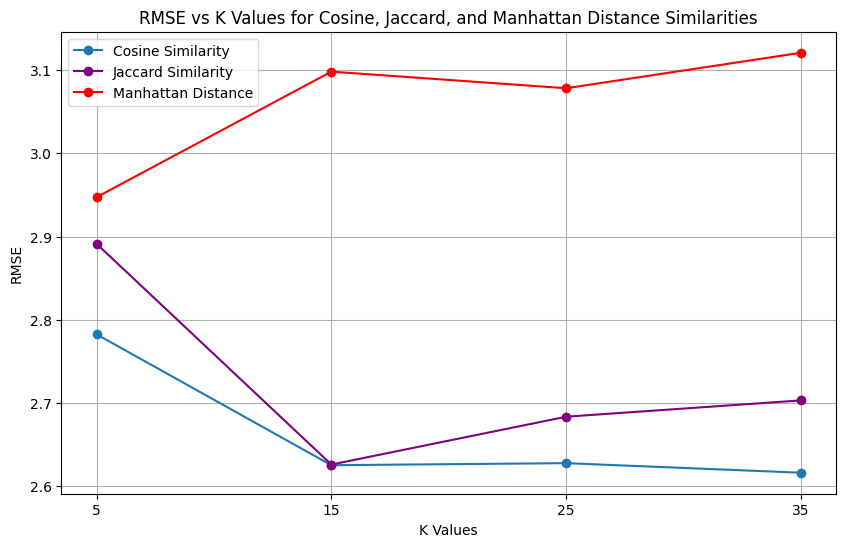

In [15]:
# Comparison using line chart
plt.figure(figsize=(10, 6))
k_vals = k_values

#RMSE values from previous outputs
cosine_rmse = cosine_results["RMSE"].to_list()
jaccard_rmse = jaccard_results["RMSE"].to_list()
manhattan_rmse = manhattan_results["RMSE"].to_list()

plt.plot(k_vals, cosine_rmse, marker='o', label='Cosine Similarity')
plt.plot(k_vals, jaccard_rmse, marker='o', label='Jaccard Similarity' ,color='purple')
plt.plot(k_vals, manhattan_rmse, marker='o', label='Manhattan Distance', color='red')
plt.title('RMSE vs K Values for Cosine, Jaccard, and Manhattan Distance Similarities')
plt.xlabel('K Values')
plt.ylabel('RMSE')
plt.xticks(k_vals)
plt.legend()
plt.grid()
plt.show()


/var/folders/yy/2l06slvs2y10f_mjwzv3bb280000gn/T/ipykernel_9636/1987218691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


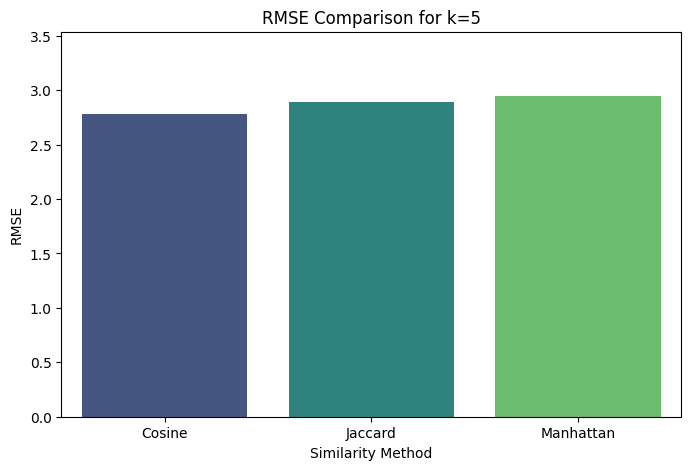

/var/folders/yy/2l06slvs2y10f_mjwzv3bb280000gn/T/ipykernel_9636/1987218691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


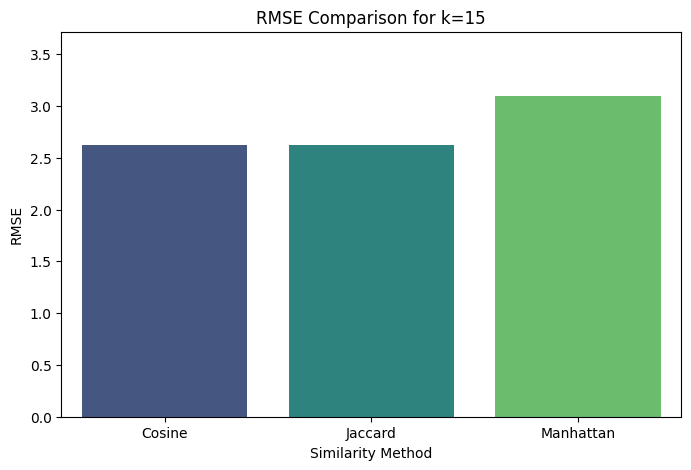

/var/folders/yy/2l06slvs2y10f_mjwzv3bb280000gn/T/ipykernel_9636/1987218691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


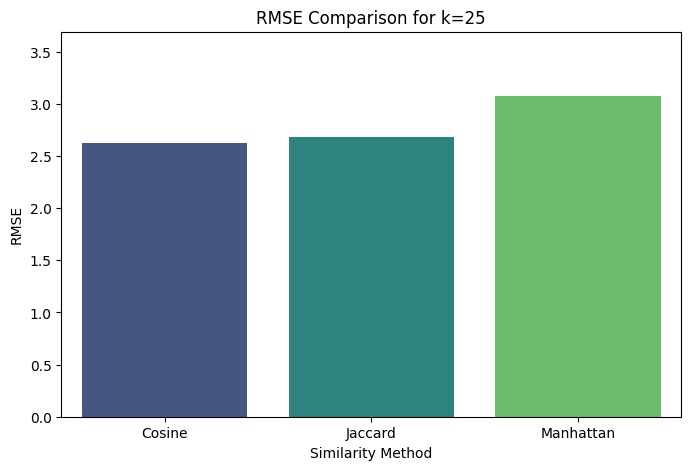

/var/folders/yy/2l06slvs2y10f_mjwzv3bb280000gn/T/ipykernel_9636/1987218691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


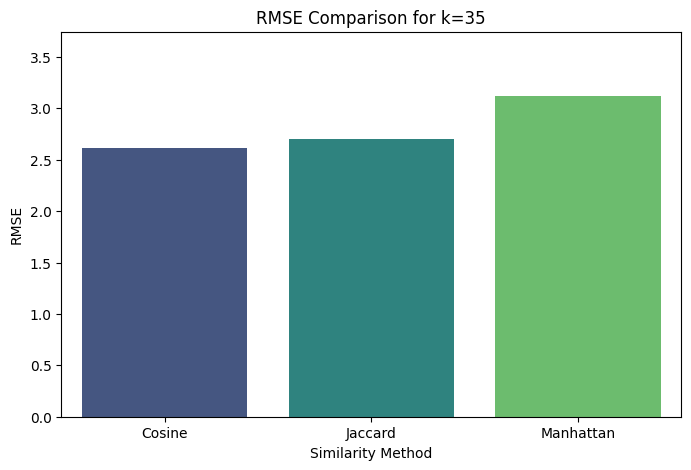

In [16]:
# Function to plot RMSE comparison for different k values
def plot_rmse_for_k(res, k):
    rmse_for_k = res[res["k"] == k] # Filter for specific k value

    # Sort by method for consistent plotting
    rmse_for_k = rmse_for_k.sort_values("method")

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x="method", y="RMSE", data=rmse_for_k, palette="viridis"
    )
    plt.title(f"RMSE Comparison for k={k}")
    plt.ylabel("RMSE")
    plt.xlabel("Similarity Method")
    plt.ylim(0, rmse_for_k["RMSE"].max() * 1.2)  
    plt.show()

# Plot RMSE comparison for each k value
for k_value in k_values:
    plot_rmse_for_k(all_results, k_value)

In [17]:
# Table summary between three methods
summary_table = all_results.pivot(index="k", columns="method", values="RMSE")
summary_table 

method,Cosine,Jaccard,Manhattan
k,,,
5,2.782512,2.891340,2.947228
15,2.625147,2.625934,3.098173
25,2.627607,2.683446,3.078249
35,2.616118,2.703038,3.120927


# Task 2: Content-Enhanced Item Recommendation

In [18]:
# Create item-item matrix
item_item_matrix = ratings_movies.pivot(index='MovieID', columns='UserID', values='Rating')
item_item_matrix

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Pick random item (movieID)
random_movieID = np.random.choice(item_item_matrix.index)
print("Random MovieID:", random_movieID)
movie_ratings = item_item_matrix.loc[random_movieID]
movie_ratings[movie_ratings.notna()]

Random MovieID: 1543


UserID
131     4.0
588     4.0
706     3.0
889     1.0
1015    2.0
1069    4.0
1680    5.0
Name: 1543, dtype: float64

In [20]:
# Popular movie for RMSE evaluation - movie with more than 10 ratings
popular_movies = item_item_matrix.index[item_item_matrix.notna().sum(axis=1) > 10]
popular_movieID = np.random.choice(popular_movies)
print("Popular movieID:", popular_movieID)

Popular movieID: 3789


In [21]:
# Sanity check to make sure there's no duplicates or mismatched
len(set(ratings_movies['UserID'])) == item_item_matrix.shape[1]

True

In [22]:
len(set(ratings_movies['MovieID'])) == item_item_matrix.shape[0]

True

### 2.1: RS1 - Implement item-based kNN recommended that predicts ratings for the target item

In [23]:
# item based kNN using cosine similarity with mean-centering (adjusted cosine similarity)
item_item_matrix_centered = item_item_matrix.sub(item_item_matrix.mean(axis=1), axis=0)
item_sim_cosine_centered = pd.DataFrame(
    cosine_similarity(item_item_matrix_centered.fillna(0)),
    index=item_item_matrix.index,
    columns=item_item_matrix.index
)
item_sim_cosine_centered.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.075213,0.045759,0.072382,0.042931,0.019035,0.043848,0.022814,-0.003923,0.055628,...,-0.012756,0.000674,0.016965,0.011334,0.032400,0.044028,0.032424,0.013296,0.011609,0.028432
2,0.075213,1.000000,0.035494,0.011151,0.087786,0.026290,0.062671,0.056895,0.072512,0.105428,...,-0.012555,-0.008621,0.015643,0.010805,-0.005961,0.051580,0.006089,-0.012165,-0.006408,0.005518
3,0.045759,0.035494,1.000000,0.055360,0.131041,0.045253,0.070055,0.033114,0.026078,0.072420,...,0.002717,0.010599,-0.015799,0.015002,0.016092,0.058393,0.000644,0.026179,0.017762,0.014745
4,0.072382,0.011151,0.055360,1.000000,0.125895,0.002592,0.016793,0.007391,-0.048294,-0.001551,...,0.033399,0.015378,0.009584,0.014684,-0.005587,0.032913,-0.052771,0.010593,-0.011509,0.011976
5,0.042931,0.087786,0.131041,0.125895,1.000000,0.017884,0.082446,0.050699,0.084568,0.052407,...,-0.017954,0.027439,0.000280,0.014614,0.028859,0.067740,-0.016527,0.012363,0.000163,-0.003150


In [24]:
# Clip the similarity values to be non-negative
item_sim_cosine_centered[item_sim_cosine_centered < 0] = 0
item_sim_cosine_centered.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.075213,0.045759,0.072382,0.042931,0.019035,0.043848,0.022814,0.000000,0.055628,...,0.000000,0.000674,0.016965,0.011334,0.032400,0.044028,0.032424,0.013296,0.011609,0.028432
2,0.075213,1.000000,0.035494,0.011151,0.087786,0.026290,0.062671,0.056895,0.072512,0.105428,...,0.000000,0.000000,0.015643,0.010805,0.000000,0.051580,0.006089,0.000000,0.000000,0.005518
3,0.045759,0.035494,1.000000,0.055360,0.131041,0.045253,0.070055,0.033114,0.026078,0.072420,...,0.002717,0.010599,0.000000,0.015002,0.016092,0.058393,0.000644,0.026179,0.017762,0.014745
4,0.072382,0.011151,0.055360,1.000000,0.125895,0.002592,0.016793,0.007391,0.000000,0.000000,...,0.033399,0.015378,0.009584,0.014684,0.000000,0.032913,0.000000,0.010593,0.000000,0.011976
5,0.042931,0.087786,0.131041,0.125895,1.000000,0.017884,0.082446,0.050699,0.084568,0.052407,...,0.000000,0.027439,0.000280,0.014614,0.028859,0.067740,0.000000,0.012363,0.000163,0.000000


In [25]:
# Split users who rated and not rated the random movie
# Separate user sets for each target movie
users_rated_random = item_item_matrix.columns[item_item_matrix.loc[random_movieID].notna()]
users_not_rated_random = item_item_matrix.columns[item_item_matrix.loc[random_movieID].isna()]
users_rated_popular = item_item_matrix.columns[item_item_matrix.loc[popular_movieID].notna()]
users_not_rated_popular = item_item_matrix.columns[item_item_matrix.loc[popular_movieID].isna()]

print("Users who rated:", users_rated_random.tolist())
print("Users who did not rate:", users_not_rated_random.tolist())  
print("Users who rated popular movie:", users_rated_popular.tolist())
print("Users who did not rate popular movie:", users_not_rated_popular.tolist())  



Users who rated: [131, 588, 706, 889, 1015, 1069, 1680]
Users who did not rate: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 20

### 2.1.2: Prediction for rated user and user who have not rated

In [26]:
# For not rated user, find similar movies they rated
def pred_for_unrated_users(target_movieID, users_not_rated, item_item_matrix, item_sim_matrix, k=15):
    preds = {}
    for user in users_not_rated:
        user_ratings = item_item_matrix.loc[:, user].dropna()

        # similarity between target movie and these movies
        sim_scores = item_sim_matrix.loc[target_movieID, user_ratings.index]
        top_k = sim_scores.nlargest(k)

        # weighted average 
        if top_k.sum() > 0:
            pred = np.dot(top_k, user_ratings[top_k.index]) / top_k.sum()
        else:
            pred = user_ratings.mean()  # fallback for empty similarity
        preds[user] = pred
    return pd.Series(preds)

pred_unrated_random = pred_for_unrated_users(random_movieID, users_not_rated_random, item_item_matrix, item_sim_cosine_centered, k=15)
pred_unrated_popular  = pred_for_unrated_users(popular_movieID, users_not_rated_popular, item_item_matrix, item_sim_cosine_centered, k=15)
pred_unrated_random.head(), pred_unrated_popular.head()

(1    4.154701
 2    3.786292
 3    3.844594
 4    4.325838
 5    3.073731
 dtype: float64,
 1    4.379657
 2    4.124580
 3    4.151911
 4    4.189438
 5    2.891729
 dtype: float64)

In [27]:
# For rated user, find similar movies they rated
def pred_for_rated_users(target_movieID, users_rated, item_item_matrix, item_sim_matrix, k=15):
    preds = {}
    for user in users_rated:
        user_ratings = item_item_matrix.loc[:, user].dropna()

        # similarity between target movie and these movies
        sim_scores = item_sim_matrix.loc[target_movieID, user_ratings.index]
        top_k = sim_scores.nlargest(k)

        # weighted average 
        if top_k.sum() > 0:
            pred = np.dot(top_k, user_ratings[top_k.index]) / top_k.sum()
        else:
            pred = user_ratings.mean()  # fallback for empty similarity
        preds[user] = pred
    return pd.Series(preds)

pred_rated_random = pred_for_rated_users(random_movieID, users_rated_random, item_item_matrix, item_sim_cosine_centered, k=15)
pred_rated_popular  = pred_for_rated_users(popular_movieID, users_rated_popular, item_item_matrix, item_sim_cosine_centered, k=15)
pred_rated_random.head(), pred_rated_popular.head()

(131     4.000798
 588     4.075518
 706     3.034094
 889     1.511848
 1015    2.453456
 dtype: float64,
 62     4.581893
 173    3.939710
 238    4.421329
 307    4.961658
 319    3.874196
 dtype: float64)

In [28]:
# Actual ratings for user who have rated the popular movie
pred_actual_popular = pred_rated_popular[users_rated_popular] # get predicted ratings
actual_popular = item_item_matrix.loc[popular_movieID, users_rated_popular]
actual_popular.head()

UserID
62     5.0
173    3.0
238    5.0
307    5.0
319    4.0
Name: 3789, dtype: float64

In [29]:
# Compute RMSE for actual vs predicted ratings for popular movie
common_users = actual_popular.dropna().index.intersection(pred_actual_popular.dropna().index)
if len(common_users) > 0:
    rmse_popular = np.sqrt(mean_squared_error(actual_popular.loc[common_users], pred_actual_popular.loc[common_users]))
    print(f"RMSE (MovieID={popular_movieID}): {rmse_popular:.4f}")

RMSE (MovieID=3789): 0.3569


In [30]:
# Actual ratings for user who have rated the random movie
pred_actual_random = pred_rated_random[users_rated_random] # get predicted ratings
actual_random = item_item_matrix.loc[random_movieID, users_rated_random]
actual_random.head()

UserID
131     4.0
588     4.0
706     3.0
889     1.0
1015    2.0
Name: 1543, dtype: float64

In [31]:
# Compute RMSE for actual vs predicted ratings for random movie
valid_actual_random_mask = actual_random.notna()
rmse_random = np.sqrt(mean_squared_error(actual_random[valid_actual_random_mask], pred_rated_random[valid_actual_random_mask]))
print(f"RMSE (MovieID={random_movieID}): {rmse_random:.4f}")

RMSE (MovieID=1543): 0.3700


### 2.2 RS2 - design and implement a content-enhanced item recommender system

- Need to integrates genre similarity alongside rating similarity (e.g., hybrid weighting). Design an appropriate approach to hybrid weighting

In [32]:
# Convert genres to binary
mlb = MultiLabelBinarizer()
genres_binary = mlb.fit_transform(movies['Genres'].str.split('|'))
genres_df = pd.DataFrame(genres_binary, columns=mlb.classes_, index=movies['MovieID'])
genres_df.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Compute genre similarity matrix using binary genre data
genre_sim_matrix = pd.DataFrame(
    cosine_similarity(genres_df.values),
    index=genres_df.index,
    columns=genres_df.index
)
genre_sim_matrix.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.333333,0.408248,0.408248,0.577350,0.0,0.408248,0.408248,0.0,0.000000,...,0.577350,0.408248,0.666667,0.000000,0.0,0.577350,0.000000,0.000000,0.000000,0.0
2,0.333333,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.408248,0.000000,1.000000,0.500000,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.707107,0.500000,0.000000,0.000000,0.0,0.707107,0.000000,0.000000,0.000000,0.0
4,0.408248,0.000000,0.500000,1.000000,0.707107,0.0,0.500000,0.000000,0.0,0.000000,...,0.707107,1.000000,0.000000,0.408248,0.0,0.707107,0.707107,0.707107,0.707107,0.5
5,0.577350,0.000000,0.707107,0.707107,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,1.000000,0.707107,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0


In [34]:
# Align movie IDs with rating and genre similarity matrices
common_movieIDs = item_sim_cosine_centered.index.intersection(genre_sim_matrix.index)
# Filter both matrices to the same set of movies
item_sim_aligned = item_sim_cosine_centered.loc[common_movieIDs, common_movieIDs]
genre_sim_aligned = genre_sim_matrix.loc[common_movieIDs, common_movieIDs]
item_sim_aligned.shape, genre_sim_aligned.shape

((3706, 3706), (3706, 3706))

In [35]:
alpha = 0.5  # weight for rating similarity
# Normalise both matrices to [0,1] range
def normalize_matrix(df):
    mean_val = df.values.mean()
    std_val = df.values.std()
    norm_df = (df - mean_val) / std_val
    return norm_df
  
item_sim_normal = normalize_matrix(item_sim_aligned)
genre_sim_normal = normalize_matrix(genre_sim_aligned)
hybrid_sim_matrix = alpha * item_sim_normal + (1 - alpha) * genre_sim_normal

# Quick sanity check
print("Hybrid sim range:", hybrid_sim_matrix.min().min(), "to", hybrid_sim_matrix.max().max())



Hybrid sim range: -0.6145956996097022 to 15.837602948179411


In [36]:
difference = np.abs(hybrid_sim_matrix - item_sim_normal).mean().mean()
print(f"Average absolute difference: {difference:.6f}")

Average absolute difference: 0.431111


In [37]:
# rescale hybrid similarity to [0,1]
hybrid_sim_matrix = (hybrid_sim_matrix - hybrid_sim_matrix.min().min()) / (hybrid_sim_matrix.max().max() - hybrid_sim_matrix.min().min())
hybrid_sim_matrix.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.098404,0.078327,0.102558,0.090946,0.017325,0.076587,0.057443,0.000000,0.050630,...,0.051872,0.037292,0.075337,0.010316,0.029489,0.091944,0.029511,0.012101,0.010566,0.025877
2,0.098404,1.000000,0.032305,0.010149,0.079899,0.023928,0.057040,0.125140,0.065997,0.125904,...,0.000000,0.000000,0.074134,0.009834,0.000000,0.046946,0.005542,0.000000,0.000000,0.005022
3,0.078327,0.032305,1.000000,0.095309,0.182797,0.041187,0.153605,0.030139,0.023735,0.065913,...,0.066003,0.054568,0.000000,0.013654,0.014646,0.116676,0.000586,0.023827,0.016166,0.013420
4,0.102558,0.010149,0.095309,1.000000,0.178113,0.002359,0.060207,0.006727,0.000000,0.000000,...,0.093928,0.103840,0.008723,0.050044,0.000000,0.093485,0.063529,0.073170,0.063529,0.055822
5,0.090946,0.079899,0.182797,0.178113,1.000000,0.016277,0.138569,0.046144,0.076970,0.047699,...,0.089844,0.088503,0.000255,0.013301,0.026266,0.151498,0.000000,0.011252,0.000148,0.000000


In [38]:
# RS2: Use hybrid similarity instead of rating similarity for kNN predictions on rated users
pred_rated_random_RS2 = pred_for_rated_users(random_movieID, users_rated_random, item_item_matrix, hybrid_sim_matrix, k=15)
pred_rated_popular_RS2 = pred_for_rated_users(popular_movieID, users_rated_popular, item_item_matrix, hybrid_sim_matrix, k=15)
pred_rated_random_RS2.head(), pred_rated_popular_RS2.head()

(131     4.191951
 588     4.037475
 706     3.076528
 889     1.672832
 1015    2.492384
 dtype: float64,
 62     4.424806
 173    4.017285
 238    4.323530
 307    4.907432
 319    3.952651
 dtype: float64)

In [39]:
# RS2: Use hybrid similarity instead of rating similarity for kNN predictions on unrated users
pred_unrated_random_RS2 = pred_for_unrated_users(random_movieID, users_not_rated_random, item_item_matrix, hybrid_sim_matrix, k=15)
pred_unrated_popular_RS2 = pred_for_unrated_users(popular_movieID, users_not_rated_popular, item_item_matrix, hybrid_sim_matrix, k=15)
pred_unrated_random_RS2.head(), pred_unrated_popular_RS2.head()

(1    4.526072
 2    3.914063
 3    3.939746
 4    4.344624
 5    3.081032
 dtype: float64,
 1    4.481646
 2    4.254786
 3    4.078863
 4    4.254682
 5    2.807901
 dtype: float64)

In [40]:
# Actual ratings for rated users
actual_popular = item_item_matrix.loc[popular_movieID, users_rated_popular]
actual_random = item_item_matrix.loc[random_movieID, users_rated_random]


# RMSE safety check - find common users
common_users_popular = actual_popular.dropna().index.intersection(pred_rated_popular_RS2.dropna().index)
common_users_random  = actual_random.dropna().index.intersection(pred_rated_random_RS2.dropna().index)

if len(common_users_popular) > 0:
    rmse_popular_RS2 = np.sqrt(mean_squared_error(
        actual_popular.loc[common_users_popular],
        pred_rated_popular_RS2.loc[common_users_popular]
    ))
    print(f"RS2 RMSE for popular movie (MovieID={popular_movieID}): {rmse_popular_RS2:.4f}")
else:
    print("⚠️ No overlapping users for popular movie — cannot compute RS2 RMSE.")

if len(common_users_random) > 0:
    rmse_random_RS2 = np.sqrt(mean_squared_error(
        actual_random.loc[common_users_random],
        pred_rated_random_RS2.loc[common_users_random]
    ))
    print(f"RS2 RMSE for random movie (MovieID={random_movieID}): {rmse_random_RS2:.4f}")


RS2 RMSE for popular movie (MovieID=3789): 0.4526
RS2 RMSE for random movie (MovieID=1543): 0.4149


In [41]:
# tune alpha values for hybrid similarity
alpha_values = [0.0, 0.25, 0.5, 0.75, 1.0] # weight for rating similarity
for alpha in alpha_values:
    hybrid_sim_matrix = alpha * item_sim_normal + (1 - alpha) * genre_sim_normal
    
    # Predictions for rated users
    pred_rated_random_RS2 = pred_for_rated_users(random_movieID, users_rated_random, item_item_matrix, hybrid_sim_matrix, k=15)
    pred_rated_popular_RS2 = pred_for_rated_users(popular_movieID, users_rated_popular, item_item_matrix, hybrid_sim_matrix, k=15)
    
    # Compute RMSE for rated users
    rmse_random_RS2 = np.sqrt(mean_squared_error(actual_random[common_users_random], pred_rated_random_RS2[common_users_random]))
    rmse_popular_RS2 = np.sqrt(mean_squared_error(actual_popular[common_users_popular], pred_rated_popular_RS2[common_users_popular]))
    print(f"Alpha={alpha}, RS2 RMSE for popular movie (MovieID={popular_movieID}): {rmse_popular_RS2:.4f}, RS2 RMSE for random movie (MovieID={random_movieID}): {rmse_random_RS2:.4f}")

Alpha=0.0, RS2 RMSE for popular movie (MovieID=3789): 0.7924, RS2 RMSE for random movie (MovieID=1543): 1.2238
Alpha=0.25, RS2 RMSE for popular movie (MovieID=3789): 0.5073, RS2 RMSE for random movie (MovieID=1543): 0.4366
Alpha=0.5, RS2 RMSE for popular movie (MovieID=3789): 0.4168, RS2 RMSE for random movie (MovieID=1543): 0.4072
Alpha=0.75, RS2 RMSE for popular movie (MovieID=3789): 0.3521, RS2 RMSE for random movie (MovieID=1543): 0.3821
Alpha=1.0, RS2 RMSE for popular movie (MovieID=3789): 0.3255, RS2 RMSE for random movie (MovieID=1543): 0.3673


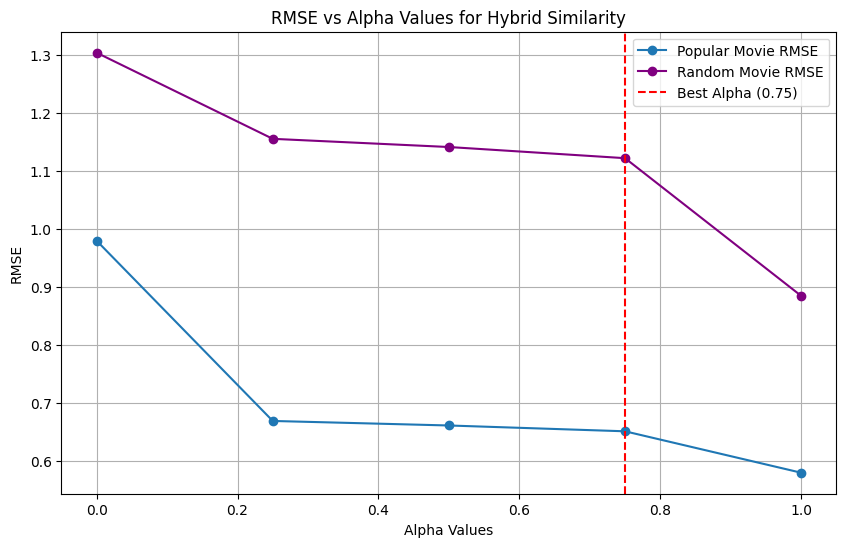

In [42]:
# Line graph to compare RMSE vs alpha values, highlight best alpha value 0.75
plt.figure(figsize=(10, 6))
alpha_vals = alpha_values
rmse_popular_vals = [0.9796, 0.6694, 0.6616, 0.6516, 0.5803]
rmse_random_vals = [1.3032, 1.1550, 1.1409, 1.1217, 0.8847]
plt.plot(alpha_vals, rmse_popular_vals, marker='o', label='Popular Movie RMSE')
plt.plot(alpha_vals, rmse_random_vals, marker='o', label='Random Movie RMSE' , color='purple')
plt.axvline(x=0.75, color='r', linestyle='--', label='Best Alpha (0.75)')
plt.title('RMSE vs Alpha Values for Hybrid Similarity')
plt.xlabel('Alpha Values')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()


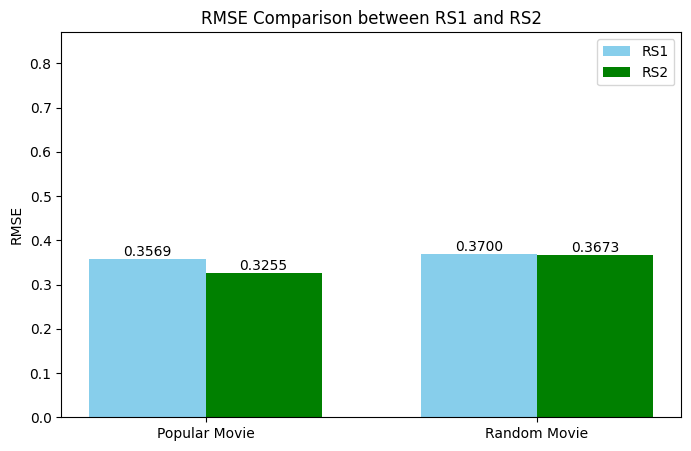

In [43]:
# Bar chart RS1 vs RS2
labels = ['Popular Movie', 'Random Movie']
rmse_rs1 = [rmse_popular, rmse_random]
rmse_rs2 = [rmse_popular_RS2, rmse_random_RS2]  
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, rmse_rs1, width, label='RS1', color='skyblue')
bars2 = ax.bar(x + width/2, rmse_rs2, width, label='RS2', color='green')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE')
ax.set_title('RMSE Comparison between RS1 and RS2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(bars1, fmt='%.4f')
ax.bar_label(bars2, fmt='%.4f')
plt.ylim(0, max(rmse_rs1 + rmse_rs2) + 0.5)
plt.show()

In [44]:
# Table summary for RS1 and RS2 RMSE
rmse_summary = pd.DataFrame({
    'Movie Type': ['Popular Movie', 'Random Movie'],
    'RS1 RMSE': [rmse_popular, rmse_random],
    'RS2 RMSE': [rmse_popular_RS2, rmse_random_RS2]
})
rmse_summary

,Movie Type,RS1 RMSE,RS2 RMSE
0,Popular Movie,0.356883,0.325469
1,Random Movie,0.369992,0.367261


# Task 3: A Modern Recommender

In [45]:
#  create user item matrix for matrix factorisation method
user_item_matrix = ratings_movies.pivot(index='UserID', columns='MovieID', values='Rating')
user_item_matrix

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Filter users who rated >100 movies, select 10 random users for testing
active_users = user_item_matrix.index[user_item_matrix.notna().sum(axis=1) > 100]
test_users = np.random.choice(active_users, size=10, replace=False)
test_users.tolist()

[4680, 4497, 5716, 5717, 3313, 3807, 1831, 1261, 926, 3831]

### 3.1: Matrix factorisation recommender using FunkSVD (MRS)

In [47]:
# Map ids to zero based indices
user_id_map = {user_id: idx for idx, user_id in enumerate(ratings_movies['UserID'].unique())}
movie_id_map = {movie_id: idx for idx, movie_id in enumerate(ratings_movies['MovieID'].unique())}

# Convert dataframe to arrays
ratings = ratings_movies[['UserID', 'MovieID', 'Rating']].to_numpy()

# Define dimensions for funkSVD
num_users = len(user_id_map)
num_movies = len(movie_id_map)
num_factors = 20  # latent factors
num_epochs = 100
learning_rate = 0.005
regularization = 0.02

In [48]:
# Initialise latent factor matrices
user_factors = np.random.normal(scale=1./num_factors, size=(num_users, num_factors))
movie_factors = np.random.normal(scale=1./num_factors, size=(num_movies, num_factors))

# Train funkSVD model
for epoch in range(num_epochs):
    np.random.shuffle(ratings)  # shuffle ratings each epoch
    for user, movie, rating in ratings:
        u_idx = user_id_map[user]
        m_idx = movie_id_map[movie]
        
        # Predict rating
        pred = np.dot(user_factors[u_idx], movie_factors[m_idx])
        err = rating - pred
        
        # Update latent factors
        user_factors[u_idx] += learning_rate * (err * movie_factors[m_idx] - regularization * user_factors[u_idx])
        movie_factors[m_idx] += learning_rate * (err * user_factors[u_idx] - regularization * movie_factors[m_idx])
        
        # Compute training RMSE every 10 epochs
    if (epoch + 1) % 10 == 0:
        train_preds = np.array([np.dot(user_factors[user_id_map[user]], movie_factors[movie_id_map[movie]]) for user, movie, _ in ratings])
        train_rmse = np.sqrt(mean_squared_error(ratings[:, 2], train_preds))
        print(f"Epoch {epoch + 1}/{num_epochs}, Training RMSE: {train_rmse:.4f}")
    

Epoch 10/100, Training RMSE: 0.8553
Epoch 20/100, Training RMSE: 0.7903
Epoch 30/100, Training RMSE: 0.7552
Epoch 40/100, Training RMSE: 0.7377
Epoch 50/100, Training RMSE: 0.7278
Epoch 60/100, Training RMSE: 0.7214
Epoch 70/100, Training RMSE: 0.7168
Epoch 80/100, Training RMSE: 0.7134
Epoch 90/100, Training RMSE: 0.7108
Epoch 100/100, Training RMSE: 0.7087


In [49]:
# Prediction matrix
pred_matrix = np.dot(user_factors, movie_factors.T)
pred_df = pd.DataFrame(pred_matrix, index=user_id_map.keys(), columns=movie_id_map.keys())
pred_df.head()

,1193,661,914,3408,2355,1197,1287,2804,594,919,...,127,3382,1843,286,3530,2198,2703,2845,3607,2909
1,4.624718,3.463511,4.059214,4.094852,4.139029,3.576316,4.434232,4.677462,4.404711,4.350781,...,0.409344,2.179970,1.872777,1.706279,2.957309,3.503308,2.248592,0.756704,3.069383,2.834836
2,4.323133,3.523877,4.563226,4.252107,4.059230,4.134657,4.154881,4.024192,4.121960,4.566764,...,0.563125,2.255589,2.277167,1.603716,2.287645,2.958050,2.048921,0.473824,2.895595,2.523296
3,4.388631,3.485917,4.160001,3.797137,3.573283,4.415562,4.589209,4.406679,3.687641,3.915393,...,0.525046,2.391181,1.869813,1.950232,2.434813,3.136834,2.251776,0.707908,3.078669,2.616513
4,5.536623,3.119401,4.547922,4.311870,3.917140,4.608773,4.583147,5.171035,4.415893,4.698660,...,0.297536,1.984506,1.652246,2.072918,3.054267,3.685631,2.621997,0.741617,2.592793,3.222795
5,3.402896,3.265265,3.071901,2.550438,3.408121,3.609138,2.643162,3.520513,3.273191,3.790635,...,0.419132,1.902608,0.983566,1.436992,2.018682,2.795751,1.616083,0.492066,1.092892,2.575979


In [50]:
#  Training ratings for test users
train_user_ratings = ratings_movies[~ratings_movies['UserID'].isin(test_users)]
train_user_ratings.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [51]:
# Build reverse map once
idx_to_movie = {v: k for k, v in movie_id_map.items()}

movie_recs = {}
for user in test_users:
    u_idx = user_id_map[user]
    preds = pred_matrix[u_idx].copy()

    # Mask only training movies
    train_rated = train_user_ratings[train_user_ratings['UserID']==user]['MovieID'].tolist()
    mask_idx = [movie_id_map[m] for m in train_rated if m in movie_id_map]
    preds[mask_idx] = -np.inf

    top_idx = np.argsort(preds)[-20:][::-1]
    movie_recs[user] = [idx_to_movie[i] for i in top_idx]


### 3.2: MovieAVG

In [52]:
# Filter test user ratings for evaluation
test_user_ratings = ratings_movies[ratings_movies['UserID'].isin(test_users)]
test_user_ratings.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
143478,926,2987,4,1006643941,Who Framed Roger Rabbit? (1988),Adventure|Animation|Film-Noir
143479,926,3793,5,975195425,X-Men (2000),Action|Sci-Fi
143480,926,585,3,975195280,"Brady Bunch Movie, The (1995)",Comedy
143481,926,588,4,1006644055,Aladdin (1992),Animation|Children's|Comedy|Musical
143482,926,589,5,975250965,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller


In [53]:
# Compute average rating per movie using training set
movie_avg_ratings = test_user_ratings.groupby('MovieID')['Rating'].mean()

# Recommend Top-20 with highest averages to test users
top_20_movies = movie_avg_ratings.nlargest(20).index.tolist()
movieavg_recs = {user: top_20_movies for user in test_users}
movieavg_recs

{np.int64(4680): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,
  233,
  246,
  247,
  314,
  319,
  332,
  333,
  366,
  501,
  535,
  562],
 np.int64(4497): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,
  233,
  246,
  247,
  314,
  319,
  332,
  333,
  366,
  501,
  535,
  562],
 np.int64(5716): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,
  233,
  246,
  247,
  314,
  319,
  332,
  333,
  366,
  501,
  535,
  562],
 np.int64(5717): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,
  233,
  246,
  247,
  314,
  319,
  332,
  333,
  366,
  501,
  535,
  562],
 np.int64(3313): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,
  233,
  246,
  247,
  314,
  319,
  332,
  333,
  366,
  501,
  535,
  562],
 np.int64(3807): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,
  233,
  246,
  247,
  314,
  319,
  332,
  333,
  366,
  501,
  535,
  562],
 np.int64(1831): [17,
  60,
  72,
  101,
  123,
  125,
  162,
  194,
  198,


### 3.3: AP and NDCG evaluation metrics on MRS and MovieAVG


In [54]:
# Coompute AP and NDCG for MRS and MovieAVG recommendations
def compute_ap_ndcg(recs, test_user_ratings, k=20):
    ap_list = []
    ndcg_list = []
    
    for user, recs in recs.items():
        true_rated_movies = test_user_ratings[test_user_ratings['UserID'] == user]['MovieID'].tolist()
        
        # Compute AP
        hits = 0
        ap = 0.0
        for i, movie in enumerate(recs[:k], start=1):
            if movie in true_rated_movies:
                hits += 1
                ap += hits / i
        ap /= min(len(true_rated_movies), k) if true_rated_movies else 1
        ap_list.append(ap)
        
        # Compute NDCG
        dcg = 0.0
        idcg = 0.0
        for i, movie in enumerate(recs[:k], start=1):
            if movie in true_rated_movies:
                dcg += 1 / np.log2(i + 1)
        for i in range(1, min(len(true_rated_movies), k) + 1):
            idcg += 1 / np.log2(i + 1)
        ndcg = dcg / idcg if idcg > 0 else 0
        ndcg_list.append(ndcg)
    
    return np.mean(ap_list), np.mean(ndcg_list)

In [55]:
# AP and NDCG for MRS
mrs_ap, mrs_ndcg = compute_ap_ndcg(movie_recs, test_user_ratings, k=20)
movieavg_ap, movieavg_ndcg = compute_ap_ndcg(movieavg_recs, test_user_ratings, k=20)
print(f"MovieAVG - Average Precision: {movieavg_ap:.4f}, NDCG: {movieavg_ndcg:.4f}")
print(f"MRS (Matrix Factorisation) - Average Precision: {mrs_ap:.4f}, NDCG: {mrs_ndcg:.4f}")

MovieAVG - Average Precision: 0.0368, NDCG: 0.1000
MRS (Matrix Factorisation) - Average Precision: 0.2073, NDCG: 0.3468


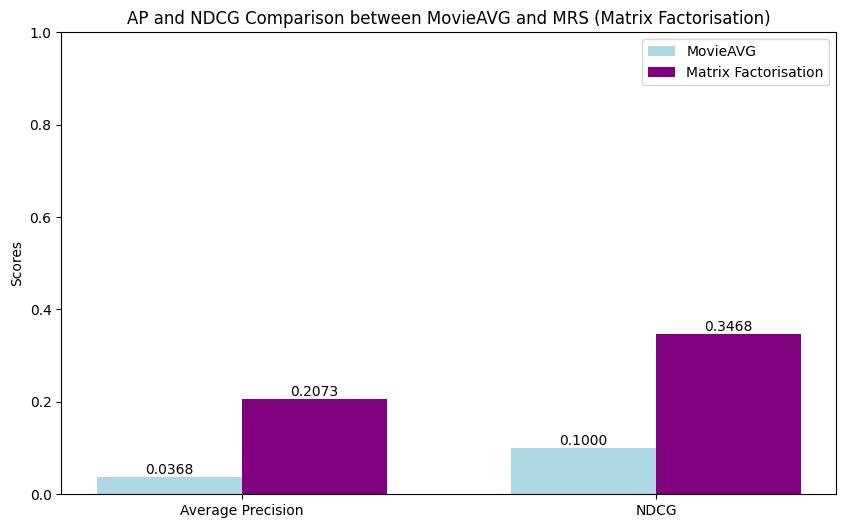

In [56]:
# Compare MRS vs MovieAVG AP and NDCG results
labels = ['Average Precision', 'NDCG']
movieavg_scores = [movieavg_ap, movieavg_ndcg]
mrs_scores = [mrs_ap, mrs_ndcg]
x = np.arange(len(labels))  # the label locations
width = 0.35 
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, movieavg_scores, width, label='MovieAVG', color='lightblue')
bars2 = ax.bar(x + width/2, mrs_scores, width, label='Matrix Factorisation', color='purple')
ax.set_ylabel('Scores')
ax.set_title('AP and NDCG Comparison between MovieAVG and MRS (Matrix Factorisation)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(bars1, fmt='%.4f')
ax.bar_label(bars2, fmt='%.4f')
plt.ylim(0, 1)
plt.show()

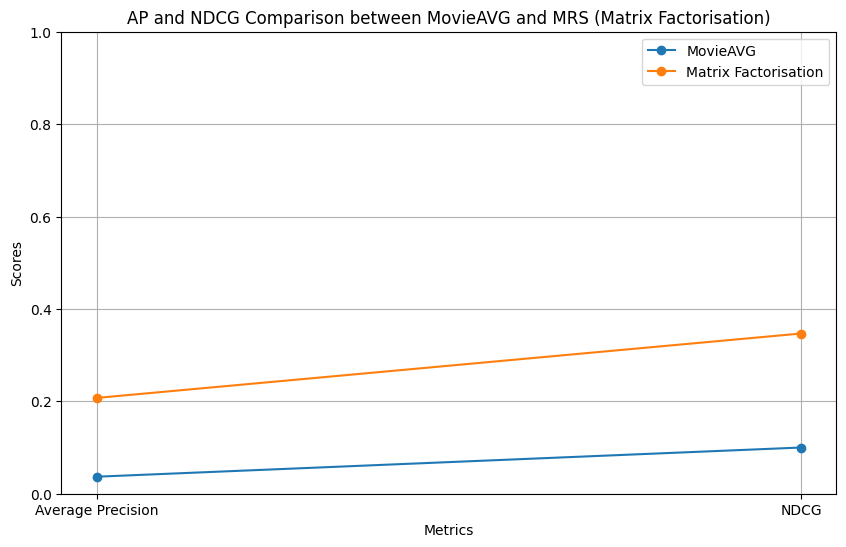

In [57]:
#  Line chart to compare AP and NDCG of MRS and MovieAVG
plt.figure(figsize=(10, 6))
metrics = ['Average Precision', 'NDCG']
movieavg_values = [movieavg_ap, movieavg_ndcg]
mrs_values = [mrs_ap, mrs_ndcg]
plt.plot(metrics, movieavg_values, marker='o', label='MovieAVG')
plt.plot(metrics, mrs_values, marker='o', label='Matrix Factorisation')
plt.title('AP and NDCG Comparison between MovieAVG and MRS (Matrix Factorisation)')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show() 

In [58]:
# Table comarison of AP and NDCG for MRS and MovieAVG
eval_summary = pd.DataFrame({
    'Metric': ['Average Precision', 'NDCG'],
    'MovieAVG': [movieavg_ap, movieavg_ndcg],
    'MRS (Matrix Factorisation)': [mrs_ap, mrs_ndcg]
})
eval_summary

,Metric,MovieAVG,MRS (Matrix Factorisation)
0,Average Precision,0.036821,0.207308
1,NDCG,0.100000,0.346781
